In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# https://www.viralml.com/video-content.html?fm=yt&v=zBVQvVCZPCM
def split_seq(seq, num_pieces):
  # https://stackoverflow.com/questions/54915803/automatically-split-data-in-list-and-order-list-elements-and-send-to-function
  start = 0
  for i in range(num_pieces):
      stop = start + len(seq[i::num_pieces])
      yield seq[start:stop]
      start = stop
        
        
def pearson(s1, s2):
  """take two pd.Series objects and return a pearson correlation"""
  s1_c=s1-np.mean(s1)
  s2_c=s2-np.mean(s2)
  return np.sum(s1_c * s2_c) / np.sqrt(np.sum(s1_c ** 2) * np.sum(s2_c ** 2))


In [3]:
# https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=eur&days=14
# https://www.convertcsv.com/json-to-csv.htm

df = pd.read_csv(
  '../data/bitcoin_market_chart_eur_days_14.csv', 
  usecols=['prices/0', 'prices/1', 'market_caps/1', 'total_volumes/1'],
)
df.columns = ['time', 'price', 'market_caps', 'total_volume']
df['time'] = pd.to_datetime(df['time'], unit='ms')
df = df.set_index(['time']).sort_index(ascending=True)

df.tail()

,price,market_caps,total_volume
time,,,
2021-10-30 12:01:40.529,53397.229746,1.007569e+12,3.067112e+10
2021-10-30 13:00:31.906,53467.849322,1.006819e+12,3.012536e+10
2021-10-30 14:04:17.175,53360.016401,1.005586e+12,3.042237e+10
2021-10-30 15:01:42.574,53202.847133,9.964385e+11,2.963074e+10
2021-10-30 16:28:10.000,53263.062415,1.004277e+12,2.812847e+10


In [4]:
df['market_caps_vs_price'] = (df['market_caps'] / df['price'])

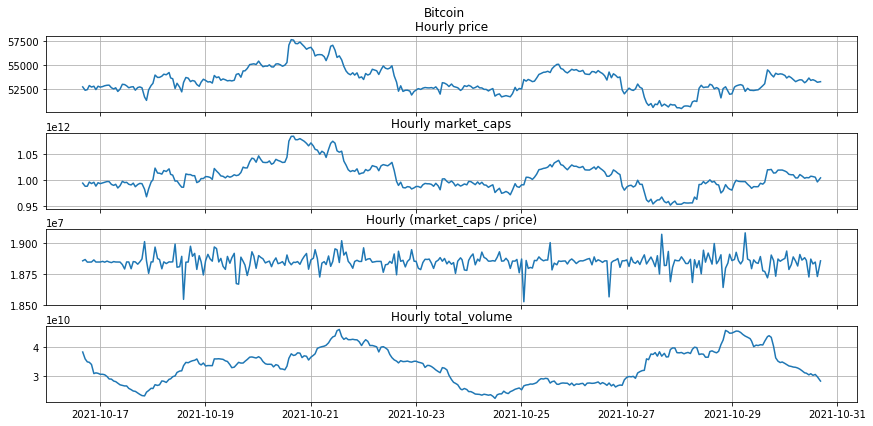

In [5]:
fig, axs = plt.subplots(4, sharex=True, figsize=(12,6), ncols=1)

fig.suptitle('Bitcoin')
fig.tight_layout()

axs[0].set_title('Hourly price')
axs[0].grid()
axs[0].plot(df['price'])
axs[1].set_title('Hourly market_caps')
axs[1].grid()
axs[1].plot(df['market_caps'])
axs[2].set_title('Hourly (market_caps / price)')
axs[2].grid()
axs[2].plot(df['market_caps_vs_price'])
axs[3].set_title('Hourly total_volume')
axs[3].grid()
axs[3].plot(df['total_volume'])

plt.show()

## Build time series out of hourly data
30 trading steps series¶

In [6]:
lookback = 30
dates = df.index
prices = list(df['price'].values)
counter_ = -1
price_series = []
for day in dates:
    counter_ += 1
    # if counter_ % 1000 == 0: print(counter_)
    if counter_ >= lookback:
        price_series.append(prices[counter_-lookback:counter_])
                
timeseries_df = pd.DataFrame(price_series)      

In [7]:
timeseries_df.head()


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,52723.047369,52370.759193,52436.055083,52862.884382,52705.051836,52792.061672,52440.823685,52791.531276,52696.665719,52757.611389,...,52832.265101,52630.607010,52715.977766,52741.133909,52379.824048,52654.756463,52719.278319,52626.557011,51671.751346,51322.232833
1,52370.759193,52436.055083,52862.884382,52705.051836,52792.061672,52440.823685,52791.531276,52696.665719,52757.611389,52839.529744,...,52630.607010,52715.977766,52741.133909,52379.824048,52654.756463,52719.278319,52626.557011,51671.751346,51322.232833,52410.106456
2,52436.055083,52862.884382,52705.051836,52792.061672,52440.823685,52791.531276,52696.665719,52757.611389,52839.529744,52893.236332,...,52715.977766,52741.133909,52379.824048,52654.756463,52719.278319,52626.557011,51671.751346,51322.232833,52410.106456,52869.166891
3,52862.884382,52705.051836,52792.061672,52440.823685,52791.531276,52696.665719,52757.611389,52839.529744,52893.236332,52903.355385,...,52741.133909,52379.824048,52654.756463,52719.278319,52626.557011,51671.751346,51322.232833,52410.106456,52869.166891,53090.078685
4,52705.051836,52792.061672,52440.823685,52791.531276,52696.665719,52757.611389,52839.529744,52893.236332,52903.355385,52632.369666,...,52379.824048,52654.756463,52719.278319,52626.557011,51671.751346,51322.232833,52410.106456,52869.166891,53090.078685,53952.068362


## Look for rises and build outcome

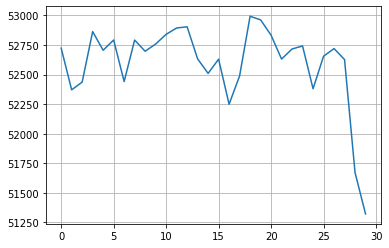

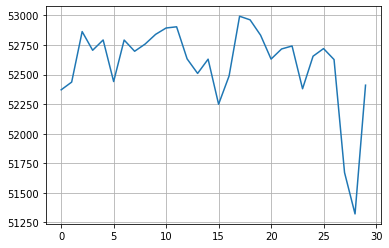

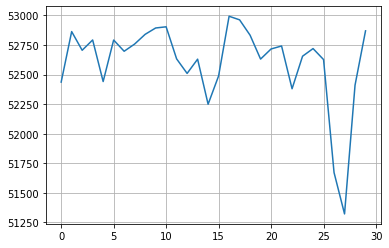

In [8]:
counter = 2
for index, row in timeseries_df.iterrows():
    counter -= 1
    # look for desired shape
    plt.plot(row.values)
    plt.grid()
    plt.show()
    if counter < 0:
        break

## Pattern simplifier
Here we break a long list of data into smaller lists set by 'complexity' and then average out each one

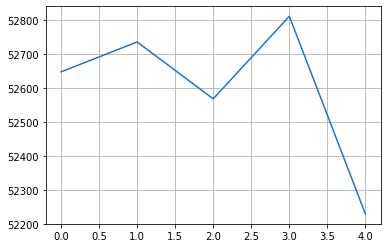

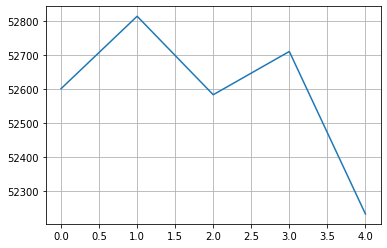

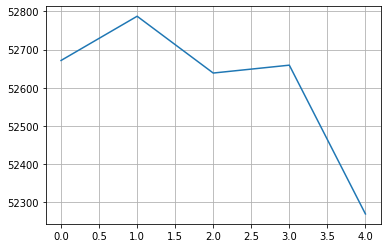

In [9]:
counter = 2
complexity = 5
for index, row in timeseries_df.iterrows():
    counter -= 1
    # look for desired shape
    plt.plot([np.mean(r) for r in split_seq(list(row.values), complexity)])
    plt.grid()
    plt.show()
    if counter < 0:
        break

## Create an ideal shape pattern
Play around with the shape, you can select ups, downs, u's or v's - anythin goes

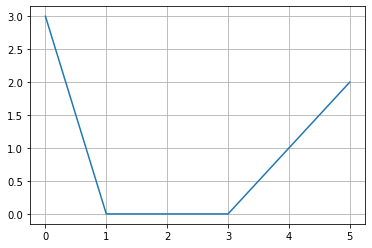

In [10]:
# let's single out the shape we want
correlate_against = [3,0,0,0,1,2] 
plt.plot(correlate_against)
plt.grid()

## Using the pearson correlation function to find the best matching shape

In [11]:
complexity = 6
correz_threshold = 0.8
outcome_list = []
for index, row in timeseries_df.iterrows():
    simplified_values = []
    for r in split_seq(list(row.values), complexity):
        simplified_values.append(np.mean(r))
    correz = pearson(simplified_values,correlate_against)
    if correz > correz_threshold:
        outcome_list.append(1)
    else:
        outcome_list.append(0)

np.mean(outcome_list)

0.04560260586319218

In [12]:
timeseries_df['outcome'] = outcome_list

In [13]:
timeseries_df_tmp = timeseries_df[timeseries_df['outcome']==1]
timeseries_df_tmp.tail()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,outcome
140,54672.159710,54913.587650,53871.326030,53217.811936,52273.622574,52833.660848,52253.158162,52370.080486,52380.533846,52286.739788,...,52727.393095,52414.144885,51971.313960,53159.743770,53114.418994,52972.860817,52761.246784,53019.076788,52769.352280,1
141,54913.587650,53871.326030,53217.811936,52273.622574,52833.660848,52253.158162,52370.080486,52380.533846,52286.739788,51876.427232,...,52414.144885,51971.313960,53159.743770,53114.418994,52972.860817,52761.246784,53019.076788,52769.352280,52712.086200,1
252,52514.782231,53018.910371,52686.939674,52558.497579,51651.805400,51075.703297,50800.229562,50993.415373,50587.215235,50936.983339,...,50473.245538,50718.161945,50744.966341,50734.990833,50661.092624,51167.014288,51268.659842,51209.016525,52576.665614,1
253,53018.910371,52686.939674,52558.497579,51651.805400,51075.703297,50800.229562,50993.415373,50587.215235,50936.983339,50880.741773,...,50718.161945,50744.966341,50734.990833,50661.092624,51167.014288,51268.659842,51209.016525,52576.665614,52888.562889,1
254,52686.939674,52558.497579,51651.805400,51075.703297,50800.229562,50993.415373,50587.215235,50936.983339,50880.741773,51296.425215,...,50744.966341,50734.990833,50661.092624,51167.014288,51268.659842,51209.016525,52576.665614,52888.562889,52649.564874,1


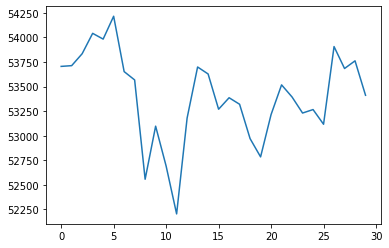

In [14]:
example = timeseries_df_tmp.values[0][:-1]
plt.plot(example)
plt.show()

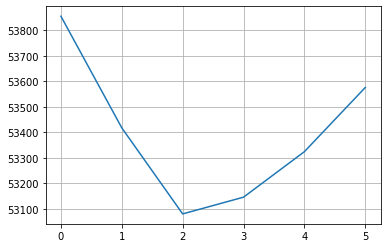

In [15]:
plt.plot([np.mean(r) for r in split_seq(list(example), complexity)])
plt.grid()
plt.show()


In [16]:
df[df['price'] == example[0]].index.values[0]

numpy.datetime64('2021-10-18T02:09:11.334000000')